# BIOS512 Assignment #5

📈 For this assignment we will work with inflation data provided by the [US Bureah of Labor Statistics](https://www.bls.gov/cpi/tables/). The data is provided as `excel` files. We hav the data for years 2016-2020 in our `assignemnts` folder under the filename `revised-seasonally-adjusted-indexes-2020.xlsx`.

Let's read the data in first. You'll need to load both the `tidyverse` and the `readxl` libraries.

In [65]:
library('tidyverse') 
library('readxl')

Now you should have a function in your session called `read_excel`. Pass in the filename from above as a `string` to the `read_excel` function and capture the `tibble` output with a variable called `df_price_index`.  

In [66]:
df_price_index <- read_excel('revised-seasonally-adjusted-indexes-2020.xlsx')
df_price_index |> head()

ITEM,TITLE,seriesid,DATA_TYPE,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SA0,All items,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,2016,237.652,237.336,238.080,238.992,239.557,240.222,240.101,240.545,241.176,241.741,242.026,242.637
SA0,All items,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,2017,243.620,243.872,243.766,244.274,244.069,244.218,244.280,245.205,246.551,246.657,247.378,247.736
SA0,All items,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,2018,248.721,249.300,249.517,250.275,250.786,251.152,251.345,251.735,252.183,252.899,252.822,252.493
SA0,All items,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,2019,252.441,252.969,254.147,255.326,255.371,255.423,255.925,256.118,256.532,257.387,257.989,258.203
SA0,All items,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,2020,258.687,258.824,257.989,256.192,255.942,257.282,258.604,259.511,260.149,260.462,260.927,261.560
SA0,All items,CUSR0000SA0,SEASONAL FACTOR,2016,99.690,99.905,100.022,100.113,100.281,100.331,100.219,100.126,100.104,99.995,99.722,99.503


We want to plot the average `SEASONALLY_ADJUSTED_INDEX` for `Energy`, `Food`, `Shelter`, and `Used cars and trucks` per month for the year 2020.

You'll need this months vector for several operations:

In [67]:
months = c('JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC')
df_price_index |>
    pivot_longer(cols=all_of(months), names_to='Month') |>
    mutate(Month=fct_relevel(Month, months)) |>
    pull(Month) |> levels()

[1] "JAN" "FEB" "MAR" "APR" "MAY" "JUN" "JUL" "AUG" "SEP" "OCT" "NOV" "DEC"

Here are the operations you'll need to perform:
- filter for...
  - `Year == 2020`, 
  - `TITLE %in% c('Energy', 'Food', 'Shelter', 'Used cars and trucks')`
  - and, `DATA_TYPE == 'SEASONALLY ADJUSTED INDEX'`
- Pivot the columns for the Months so the table is in long-form and each row represents a month (hint: use `cols = months` with `pivot_longer`)
- Group by month and `TITLE` then summarize by finding the mean index for each group.
- And last, use `forcats` to set the levels for the month column (hint: `tct_relevel(name, months)`)

In [68]:
filtered_year <- df_price_index %>%
  filter(
    YEAR == 2020,
    TITLE %in% c('Energy', 'Food', 'Shelter', 'Used cars and trucks'),
    DATA_TYPE == 'SEASONALLY ADJUSTED INDEX'
  )

filtered_year |> head()

ITEM,TITLE,seriesid,DATA_TYPE,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SA0E,Energy,CUSR0000SA0E,SEASONALLY ADJUSTED INDEX,2020,219.117,213.963,202.995,183.788,179.610,187.591,191.566,193.362,195.995,197.157,198.576,203.716
SAF1,Food,CUSR0000SAF1,SEASONALLY ADJUSTED INDEX,2020,260.987,261.832,262.530,266.322,268.093,269.543,268.734,269.044,269.325,269.833,269.746,270.656
SAH1,Shelter,CUSR0000SAH1,SEASONALLY ADJUSTED INDEX,2020,323.322,324.294,324.500,324.515,325.156,325.605,326.264,326.696,326.969,327.360,327.805,328.210
SETA02,Used cars and trucks,CUSR0000SETA02,SEASONALLY ADJUSTED INDEX,2020,137.958,137.588,138.242,137.532,137.592,135.795,139.541,147.556,155.337,156.658,154.495,153.107
SA0E,Energy,CWSR0000SA0E,SEASONALLY ADJUSTED INDEX,2020,218.679,213.335,201.787,181.349,177.195,185.679,189.907,191.760,194.385,195.584,196.851,202.218
SAF1,Food,CWSR0000SAF1,SEASONALLY ADJUSTED INDEX,2020,259.453,260.238,260.991,265.051,267.009,268.384,267.544,267.769,267.966,268.517,268.363,269.295


In [69]:
pivoted_data <- filtered_year %>%
  pivot_longer(cols = all_of(months), names_to = "Month", values_to = "Value")

In [70]:
summarized_data <- pivoted_data %>%
  group_by(Month, TITLE) %>%
  summarize(Price_index = mean(Value)) %>%
  mutate(Month = fct_relevel(Month, "JAN", "FEB", "MAR", "APR", "MAY", "JUN", 
                             "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"))
summarized_data |> head()

`summarise()` has grouped output by 'Month'. You can override using the
`.groups` argument.
Warning message:
“There were 12 warnings in `mutate()`.
The first warning was:
ℹ In argument: `Month = fct_relevel(...)`.
ℹ In group 1: `Month = "APR"`.
Caused by warning:
! 11 unknown levels in `f`: JAN, FEB, MAR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, and
DEC
ℹ Run `dplyr::last_dplyr_warnings()` to see the 11 remaining warnings.”


Month,TITLE,Price_index
<fct>,<chr>,<dbl>
APR,Energy,182.5685
APR,Food,265.6865
APR,Shelter,321.0415
APR,Used cars and trucks,137.9830
AUG,Energy,192.5610
AUG,Food,268.4065


The first three rows of your table will look something like this:

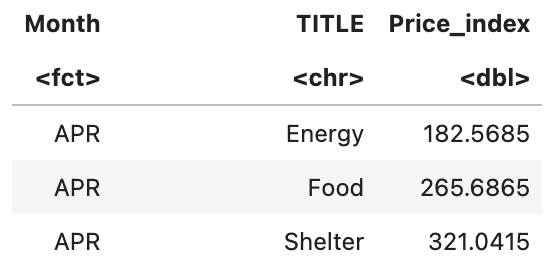

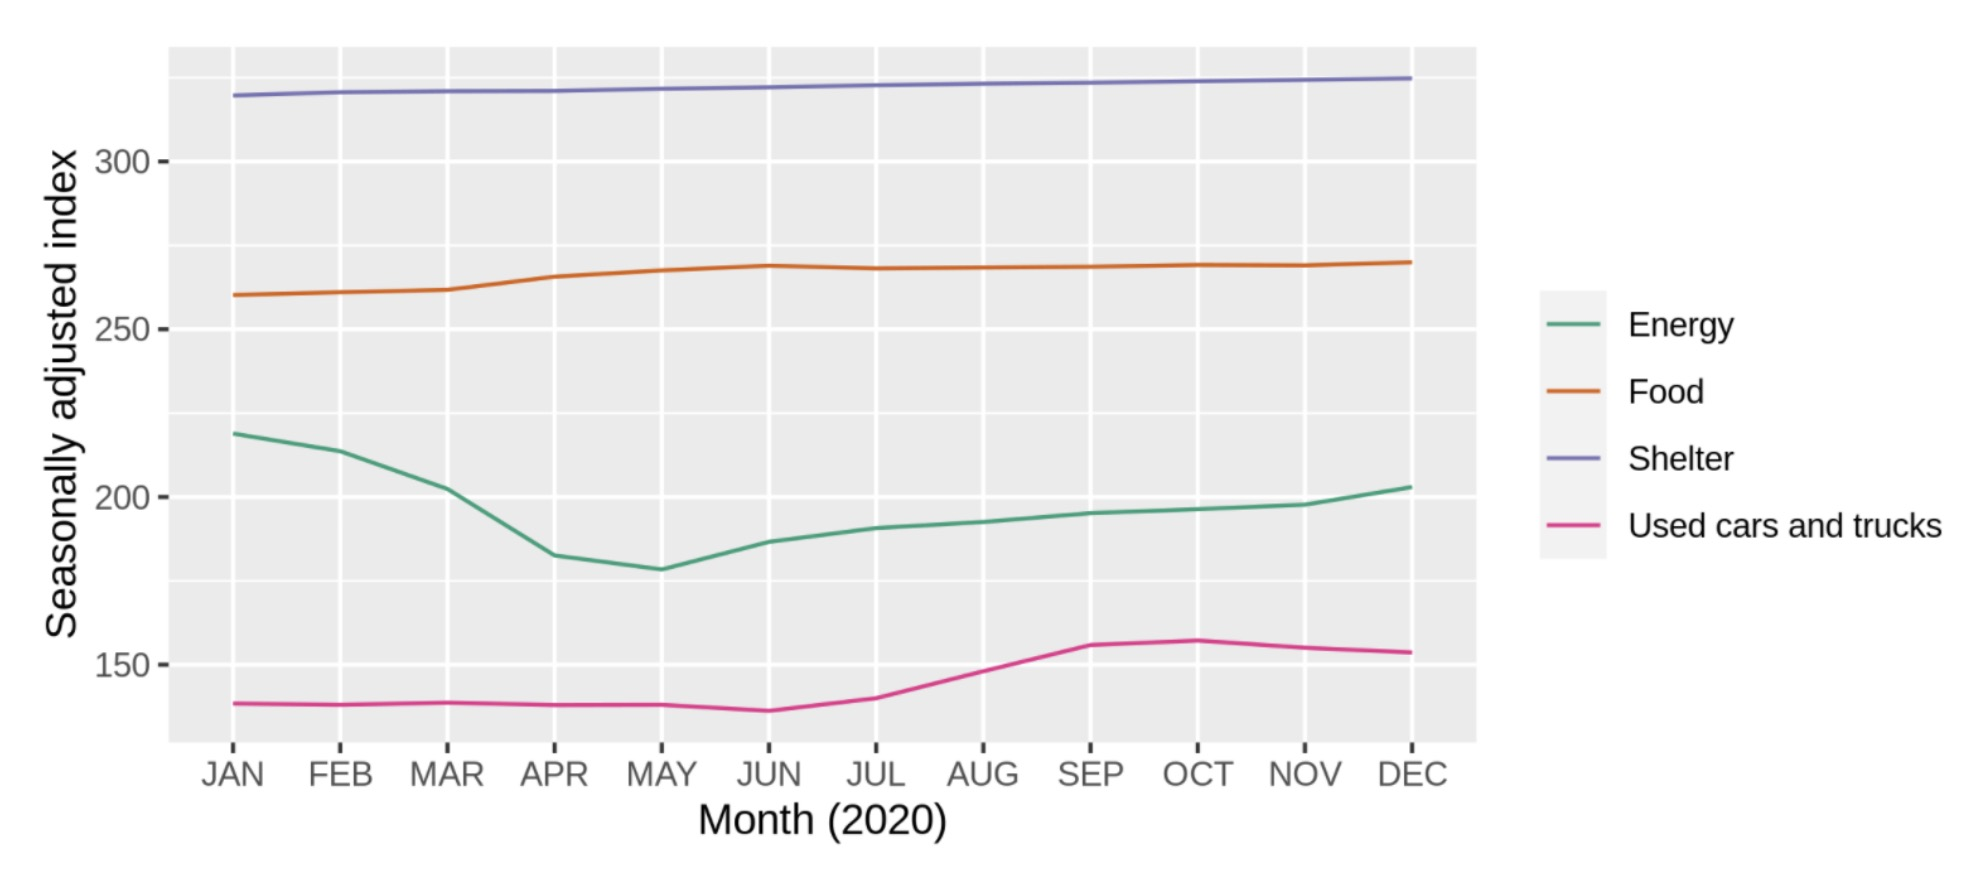Ok! Now make this plot:

![image.png](attachment:f46e3063-30b3-4a19-bc9c-111f9804a5ac.png)

This is how the [USBLS defines the index](https://www.bls.gov/cpi/) (if you're curious):

>  The Consumer Price Index (CPI) is a measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services.

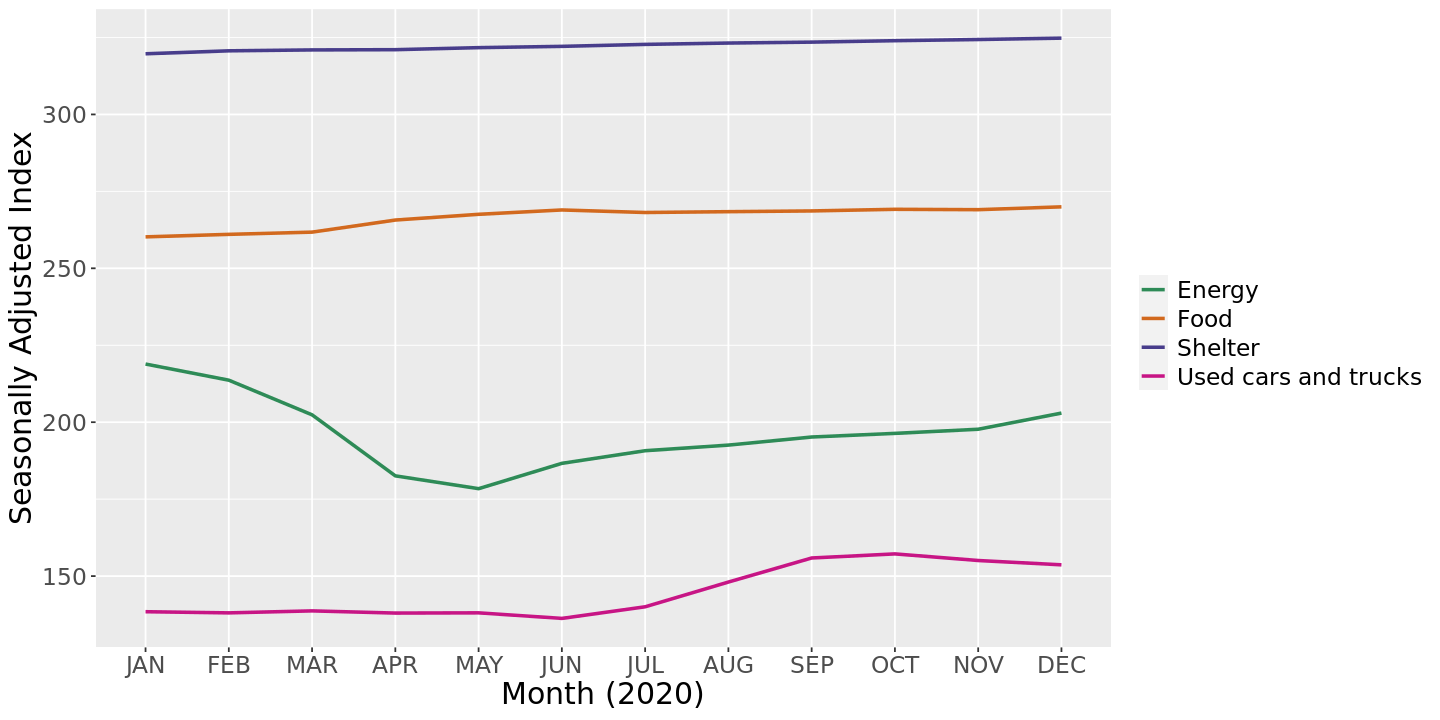

In [71]:
price_months = price_index |>
    mutate(Month = factor(Month, levels = c('JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC')))

options(repr.plot.width = 12, repr.plot.height = 6)
p = ggplot(price_months, aes(x = Month, y = Price_index, 
    color = TITLE, group = TITLE)) + geom_line(size =1) + 
    labs(x = "Month (2020)", y = "Seasonally Adjusted Index") + 
    scale_color_manual(values = c("seagreen", "chocolate", "darkslateblue", "mediumvioletred"), name = NULL) +
    theme(axis.text = element_text(size = 14), axis.title.x = element_text(size = 18), 
          axis.title.y = element_text(size = 18), 
          legend.text = element_text(size = 14), )
    
p
